# Citation: Keras Model Code from [tensorflow.org](https://www.tensorflow.org/tutorials/keras/basic_text_classification) text classification
Testing out data preprocessing and mdoels for text analysis.

In [1]:
import nltk
import tensorflow as tf
import numpy as np
import pandas as pd
import keras
import sklearn

Using TensorFlow backend.


In [2]:
########### Load the IMDB move review dataset for sentiment
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [63]:
########### Load the word index and create reserved words
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [130]:
########## Read in the datafile
df = pd.read_csv("suggestions_data_balanced.csv", engine = 'python');
df.fillna(0, inplace=True)
num_data = len(df)
print(num_data)
print(df.dtypes)

7272
is_prompt_exists     int64
comments            object
dtype: object


In [3]:
########## Shuffle the data for randomization purposes
# df = sklearn.utils.shuffle(df)
df = df.iloc[np.random.permutation(len(df))]
df = df.reset_index(drop=True)

In [4]:
print("Data:", df['comments'][0], "\nLabel:", df['is_prompt_exists'][0]) # Check randomization

Data: The authors need to be more explicit about the changes they will make. It is good that the team communicated that they will update the wiki to reflect the current DB schema, however instead of stating the potential changes, the structure of the entire wiki was instead presented. I think once the team dives a bit deeper into the project, they will be able to provide the names of the DB tables that were changed or removed. 
Label: 1


In [131]:
###################### Create 
def bagofwords():
#     sentence = []
#     sentence.append("Hello there my name is name is blank.")
#     sentence.append("This is another sample name there phrase.")
#     text = nltk.word_tokenize(sentence[0].lower())
#     words = list(set(text))
#     text = nltk.word_tokenize(sentence[1].lower())
#     words.append(list(set(text)))
#     print(words)
    length = 0
    a = []
    for loop in range(num_data):
        comment = df['comments'][loop]
        sentTok = nltk.sent_tokenize(comment)
        length = length + len(sentTok)
        for sentence in sentTok:
    #         a.append("Hello there my name is name is blank.")
    #         a.append("This is another sample name there phrase.")
            a.append(sentence)
    
    
    a = (' '.join(a)).lower()
#     print(a)
#     print('\n')
    text = nltk.word_tokenize(a)
#     print(text)
    newset = set()
    for word in text:
#         print(word)
        newset.add(word)
#     print(newset)
#     print('\n\n')
    # Fill in found words
    word_to_ix = { w:(i+4) for i,w in enumerate(sorted(newset)) }
    ix_to_word = { (i+4):w for i,w in enumerate(sorted(newset)) }
    # Fill in reserved values
    ix_to_word[0] = "<PAD>"
    ix_to_word[1] = "<START>"
    ix_to_word[2] = "<UNK>"
    ix_to_word[3] = "<UNUSED>"
    word_to_ix["<PAD>"] = 0 # Used to equalize text length
    word_to_ix["<START>"] = 1
    word_to_ix["<UNK>"] = 2  # unknown value
    word_to_ix["<UNUSED>"] = 3
    return word_to_ix, ix_to_word
# print("\nLENGTH:", length)

In [132]:
word_to_ix, ix_to_word = bagofwords()
# print(ix_to_word)
# print('\n')
# print(word_to_ix)

In [143]:
print(ix_to_word[510])
print(word_to_ix["straightforward"]) # Ensure word is in dictionary
print(len(ix_to_word))
print(len(word_to_ix))
# print(ix_to_word)

afterward
4591
5392
5392


In [8]:
###################### Convert original data to number representations
###################### WARNING: Conversion process is time consuming (multiple minutes)
loop = 0
for loop in range(num_data):
    if (loop % 500 == 0):
        print("Update:", loop) # Check spot in converter
    comment = df['comments'][loop]
    comment = comment.lower()
    text = nltk.word_tokenize(comment)
    length = len(text)
    for i in range(length):
        text[i] = word_to_ix[text[i]]
#         print(text[i]) 
#     print(text)
    df['comments'][loop] = text

Update: 0


/Users/gabrielfinnrzingle/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Update: 500
Update: 1000
Update: 1500
Update: 2000
Update: 2500
Update: 3000
Update: 3500
Update: 4000
Update: 4500
Update: 5000
Update: 5500
Update: 6000
Update: 6500
Update: 7000


In [30]:
##################### Print out portions for testing
df = pd.read_csv("suggestions_data_balanced_converted2.csv", engine = 'python');
df.fillna(0, inplace=True)
print(df.head())
print(len(df))
print(df["Sentence"][0])
df["Sentence"][0] = df["Sentence"][0][1:]
print('\n')
print(df["Sentence"][0])
df["Sentence"][0] = df["Sentence"][0][:len(df["Sentence"] - 2)]
print('\n')
print(df["Sentence"][0])

                                            Sentence  Label
0  [4853, 760, 3247, 4916, 827, 3188, 2008, 405, ...      1
1  [5005, 1618, 574, 811, 3559, 663, 1736, 2556, ...      1
2  [4853, 4781, 2374, 2302, 398, 2299, 3320, 3347...      0
3  [2738, 60, 2366, 2164, 3042, 4916, 2336, 5276,...      1
4  [4866, 5169, 4879, 4834, 4853, 2759, 628, 3154...      0
7272
[4853, 760, 3247, 4916, 827, 3188, 2008, 405, 4853, 1026, 4866, 5306, 2993, 110, 2738, 2729, 2299, 4851, 4853, 4781, 1170, 4851, 4866, 5306, 5074, 4853, 5302, 4916, 3937, 4853, 1445, 1474, 4213, 85, 2464, 2653, 3347, 4565, 4853, 3634, 1026, 85, 4853, 4609, 3347, 4853, 1877, 5302, 5241, 2653, 3670, 110, 2477, 4870, 3364, 4853, 4781, 1691, 398, 869, 1510, 2700, 4853, 3733, 85, 4866, 5306, 827, 404, 4916, 3769, 4853, 3223, 3347, 4853, 1474, 4749, 4851, 5275, 1025, 3397, 3981, 110]


/Users/gabrielfinnrzingle/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys




4853, 760, 3247, 4916, 827, 3188, 2008, 405, 4853, 1026, 4866, 5306, 2993, 110, 2738, 2729, 2299, 4851, 4853, 4781, 1170, 4851, 4866, 5306, 5074, 4853, 5302, 4916, 3937, 4853, 1445, 1474, 4213, 85, 2464, 2653, 3347, 4565, 4853, 3634, 1026, 85, 4853, 4609, 3347, 4853, 1877, 5302, 5241, 2653, 3670, 110, 2477, 4870, 3364, 4853, 4781, 1691, 398, 869, 1510, 2700, 4853, 3733, 85, 4866, 5306, 827, 404, 4916, 3769, 4853, 3223, 3347, 4853, 1474, 4749, 4851, 5275, 1025, 3397, 3981, 110]


TypeError: unsupported operand type(s) for -: 'str' and 'int'

In [127]:
##################### Converted word to number data into a csv file to save time
num_to_print = len(df)
import csv
# with open('suggestions_data_balanced_converted2.csv', 'w', newline = '') as f:
#     writer = csv.writer(f)
#     writer.writerow(["Sentence", "Label"])
#     for i in range(num_to_print):
#         sentence = traindata[i]
#         sentence = [int(i) for i in sentence]
#         label = df['Label'][i]
#         if (df['Label'][i] == -1):
#             label = 0
#         writer.writerow([sentence, label])

### (train_data, train_labels), (test_data, test_labels) Use this to get CSV form
# print(train_data[0])
# with open('imdb_move_reviews.csv', 'w', newline = '') as f:
#     writer = csv.writer(f)
#     writer.writerow(["sent_train", "train_label", "sent_test", "test_label"])
#     for i in range(25000):
#         sent_train = train_data[i]
#         train_label = train_labels[i]
#         sent_test = test_data[i]
#         test_label = test_labels[i]
#         writer.writerow([sent_train, train_label, sent_test, test_label])

In [416]:
##################### Convert words back to check conversion 
# for i in range(num_data):
#     comment = df['comments'][i]
#     length = len(comment)
#     count = 0;
#     text = []
#     for num in comment:
#         text.append(ix_to_word[num])
#         count += 1
#     text = (' '.join(text))
#     print(text,'\n')

the changes mentioned are pretty straightforward , more information on how their plan to make those changes are should be provided in the document . 

the images and visual aids explain the flow very well . there were no uml diagrams in the document though . 

although , the writeup explains the functionality very well , they have n't mentioned which design pattern they have used an why ? . 

no new tests have been added 

changes are very good , the author has proposed design patterns they will be used in the implementation , along with that method to calculate score has been explained elaborately 

the design appears to be sound , but i think more details are needed . 

1. the plan is sound and seems to be clearly explained bullet points 

the principles used to solving the problem are sound 

yes , the code is well written and follows the conventions of ruby design principles . 

code written following the coding standards 



In [144]:
############# Retrieve number converted data (saves time)
df = pd.read_csv("suggestions_data_balanced_converted2.csv", engine = 'python');

In [168]:
############# Initialize training data
num_train = int(num_data * 0.8) # df.head this amount
num_test = int(num_data - num_train) # df.tail this amount
# print(num_train)
# print(num_test)
# print(len(df), "  ", num_train+num_test)
# train_data = df['Sentence'].head(num_train)
train_data = full_data[:num_train]
# for i in range(8):
#     print(train_data[i])

In [169]:
############# Initialize testing data **(requires full dataset conversion for tail() to work)**
# print(df['comments'].tail(2))
# test_data = df['Sentence'].tail(num_test)
test_data = full_data[num_train:]
# test_data = df['comments'].head(4) #### Remove later (PLACEHOLDER STATEMENT)
# for i in range(2):
#     print(test_data[i])

In [147]:
############ Function enabling conversion of indexed number sentence into word sentence
def decode_review(text):
#     return ' '.join([reverse_word_index.get(i, '?') for i in text])
    return ' '.join([ix_to_word[i] for i in text])

In [170]:
print(decode_review(train_data[4]))

they very thoroughly tested the job applications model and controller . there were tests for the admin user but i could n't replicate them on the actual website so either the tests did n't pass or the user given in the readme was n't an


In [172]:
############# Find the maximum sentence length to use for padding training data
maxlength = 0
for array in range(len(full_data)):
#     maxlength = max(len(array),maxlength)
    maxlength = max(len(full_data[array]), maxlength)
print("Full:", maxlength)
# for array in range(len(test_data)):
# #     maxlength = max(len(array),maxlength)
#     maxlength = max(len(test_data[array + 5817]), maxlength)
# print("Test:", maxlength)

Full: 341


In [176]:
for array in train_data:
    print(train_data[5816])
    break

[4853, 2004, 5275, 398, 2919, 2366, 4916, 2155, 737, 4907, 110, 2464, 85, 3190, 3347, 4853, 4901, 85, 2477, 5031, 4853, 1026, 4851, 5345, 3247, 4916, 827, 2980, 4916, 4853, 2115, 3470, 3347, 4853, 3733, 110, 474, 398, 2907, 4916, 3260, 4938, 4453, 4851, 398, 3861, 971, 2380, 4853, 1023, 4916, 2861, 3188, 2500, 4866, 663, 1265, 5306, 827, 855, 4916, 4876]


In [227]:
# for i in range (num_train):
#     train_data[i+1] = train_data[i+1].split(",")
for i in range (num_test):
    test_data[i + 5817] = test_data[i + 5817].split(",")

AttributeError: 'list' object has no attribute 'split'

In [177]:
############# Initialize training and test labels
train_labels = df['Label'].head(num_train) # is_prompt_exists
test_labels = df['Label'].tail(num_test)
print(maxlength)
print(train_data[0])
for i in range(10):
    print(train_labels[i])

341
[4853, 760, 3247, 4916, 827, 3188, 2008, 405, 4853, 1026, 4866, 5306, 2993, 110, 2738, 2729, 2299, 4851, 4853, 4781, 1170, 4851, 4866, 5306, 5074, 4853, 5302, 4916, 3937, 4853, 1445, 1474, 4213, 85, 2464, 2653, 3347, 4565, 4853, 3634, 1026, 85, 4853, 4609, 3347, 4853, 1877, 5302, 5241, 2653, 3670, 110, 2477, 4870, 3364, 4853, 4781, 1691, 398, 869, 1510, 2700, 4853, 3733, 85, 4866, 5306, 827, 404, 4916, 3769, 4853, 3223, 3347, 4853, 1474, 4749, 4851, 5275, 1025, 3397]
1
1
0
1
0
0
1
0
1
0


In [28]:
print(train_data[1])
# newstr = train_data[1:]
print('\n')
newstr = "[5005"
print(newstr)
newstr = newstr[1:]
print(newstr)
# results = map(int, train_data[1])
# results = list(map(int, train_data[1]))
# print(results)

[   1  194 1153  194 8255   78  228    5    6 1463 4369 5012  134   26
    4  715    8  118 1634   14  394   20   13  119  954  189  102    5
  207  110 3103   21   14   69  188    8   30   23    7    4  249  126
   93    4  114    9 2300 1523    5  647    4  116    9   35 8163    4
  229    9  340 1322    4  118    9    4  130 4901   19    4 1002    5
   89   29  952   46   37    4  455    9   45   43   38 1543 1905  398
    4 1649   26 6853    5  163   11 3215    2    4 1153    9  194  775
    7 8255    2  349 2637  148  605    2 8003   15  123  125   68    2
 6853   15  349  165 4362   98    5    4  228    9   43    2 1157   15
  299  120    5  120  174   11  220  175  136   50    9 4373  228 8255
    5    2  656  245 2350    5    4 9837  131  152  491   18    2   32
 7464 1212   14    9    6  371   78   22  625   64 1382    9    8  168
  145   23    4 1690   15   16    4 1355    5   28    6   52  154  462
   33   89   78  285   16  145   95    0    0    0    0    0    0    0
    0 

In [167]:
# df = pd.read_csv("suggestions_data_balanced_converted.csv", engine = 'python');
# df.fillna(0, inplace=True)
# print(df['Sentence'][0], '\n')
# splittest = (' '.join(df['Sentence'][0]))
# print(splittest)
traindata = []
for dat in df['Sentence']:
    paragraph = []
    sentence = []
    for letter in dat:
        if (letter == '[' or letter == ']' or letter == ' '):
            continue
        elif (letter == ','):
            sentence = (''.join(sentence))
            paragraph.append(sentence)
    #         print(sentence)
            sentence = []
        else:
            sentence.append(letter)
#     paragraph = (' '.join(paragraph))
    paragraph = [int(i) for i in paragraph]
    traindata.append(paragraph)
# print(paragraph, '\n')
print(traindata[0][0], '\n')
full_data = traindata
# print(train_data[0])

4853 



In [178]:
############# Pad the words to equalize array length
# For non IMDB dataset, used maxlength for maxlen instead of 256
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                       value=word_to_ix["<PAD>"],
                                                       padding='post',
                                                       maxlen=maxlength)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                      value=word_to_ix["<PAD>"],
                                                      padding='post',
                                                      maxlen=maxlength)

# train_data = keras.preprocessing.sequence.pad_sequences(train_data,
#                                                        value=word_index["<PAD>"],
#                                                        padding='post',
#                                                        maxlen=256)

# test_data = keras.preprocessing.sequence.pad_sequences(test_data,
#                                                       value=word_index["<PAD>"],
#                                                       padding='post',
#                                                       maxlen=256)

In [179]:
len(train_data[0]), len(train_data[1]) # Check the new length of some train data

(341, 341)

In [180]:
print(train_data[0]) # Check new padded number sentences

[4853  760 3247 4916  827 3188 2008  405 4853 1026 4866 5306 2993  110
 2738 2729 2299 4851 4853 4781 1170 4851 4866 5306 5074 4853 5302 4916
 3937 4853 1445 1474 4213   85 2464 2653 3347 4565 4853 3634 1026   85
 4853 4609 3347 4853 1877 5302 5241 2653 3670  110 2477 4870 3364 4853
 4781 1691  398  869 1510 2700 4853 3733   85 4866 5306  827  404 4916
 3769 4853 3223 3347 4853 1474 4749 4851 5275 1025 3397    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [182]:
############# Creates the model
vocab_size = num_data # suggestions_data_balanced.csv dataset length becomes input shape: 7272
# vocab_size = 10000 # For IMDB Dataset

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 16)          116352    
_________________________________________________________________
global_average_pooling1d_3 ( (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 116,641
Trainable params: 116,641
Non-trainable params: 0
_________________________________________________________________


In [183]:
############ Configured model with optimizer and loss function
model.compile(optimizer = tf.train.AdamOptimizer(),
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

In [185]:
########### Initiate validation sets
# Note -> vocab_size = len(df)
val_size = int(num_train * 0.8) # Set apart 20% of train data for validation

x_val = train_data[:num_train-val_size]
partial_x_train = train_data[num_train-val_size:]

y_val = train_labels[:num_train-val_size]
partial_y_train = train_labels[num_train-val_size:]

#### Below is for IMDB Dataset
# x_val = train_data[:10000]
# partial_x_train = train_data[10000:]

# y_val = train_labels[:10000]
# partial_y_train = train_labels[10000:]

In [186]:
# print(x_val[0])
# print(partial_x_train[0])
# print(len(train_data))
# print(len(x_val))
# print(len(partial_x_train))

print(len(x_val))
print(len(partial_x_train))
print(x_val[0])

1164
4653
[4853  760 3247 4916  827 3188 2008  405 4853 1026 4866 5306 2993  110
 2738 2729 2299 4851 4853 4781 1170 4851 4866 5306 5074 4853 5302 4916
 3937 4853 1445 1474 4213   85 2464 2653 3347 4565 4853 3634 1026   85
 4853 4609 3347 4853 1877 5302 5241 2653 3670  110 2477 4870 3364 4853
 4781 1691  398  869 1510 2700 4853 3733   85 4866 5306  827  404 4916
 3769 4853 3223 3347 4853 1474 4749 4851 5275 1025 3397    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0  

In [187]:
############ Trains the model
# history = model.fit(partial_x_train,
#                    partial_y_train,
#                    epochs=20,
#                    batch_size=256,
#                    validation_data=(x_val, y_val),
#                    verbose=1)
#### Below is for IMDB Dataset
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=40,
                   batch_size=512,
                   validation_data=(x_val, y_val),
                   verbose=1)

Train on 4653 samples, validate on 1164 samples
Epoch 1/40
4653/4653 [==============================] - 1s 128us/step - loss: 0.6925 - acc: 0.5216 - val_loss: 0.6921 - val_acc: 0.5507
Epoch 2/40
4653/4653 [==============================] - 0s 23us/step - loss: 0.6916 - acc: 0.6389 - val_loss: 0.6913 - val_acc: 0.6658
Epoch 3/40
4653/4653 [==============================] - 0s 23us/step - loss: 0.6903 - acc: 0.6875 - val_loss: 0.6899 - val_acc: 0.6632
Epoch 4/40
4653/4653 [==============================] - 0s 23us/step - loss: 0.6883 - acc: 0.6828 - val_loss: 0.6879 - val_acc: 0.6796
Epoch 5/40
4653/4653 [==============================] - 0s 23us/step - loss: 0.6858 - acc: 0.6834 - val_loss: 0.6857 - val_acc: 0.6787
Epoch 6/40
4653/4653 [==============================] - 0s 23us/step - loss: 0.6830 - acc: 0.6871 - val_loss: 0.6831 - val_acc: 0.6684
Epoch 7/40
4653/4653 [==============================] - 0s 24us/step - loss: 0.6795 - acc: 0.6910 - val_loss: 0.6801 - val_acc: 0.6701
Epoch 

In [188]:
########### Evaluate the model
results = model.evaluate(test_data, test_labels)

print(results)

1455/1455 [==============================] - 0s 21us/step
[0.573122971492125, 0.7154639177306001]


In [251]:
########### Graph the data
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

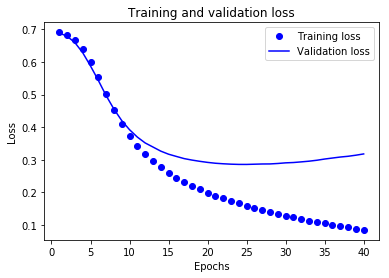

In [252]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

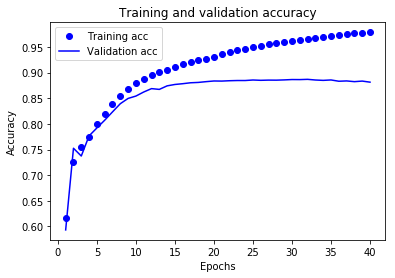

In [253]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#@title MIT License
'#
'# Copyright (c) 2017 François Chollet
'#
'# Permission is hereby granted, free of charge, to any person obtaining a
'# copy of this software and associated documentation files (the "Software"),
'# to deal in the Software without restriction, including without limitation
'# the rights to use, copy, modify, merge, publish, distribute, sublicense,
'# and/or sell copies of the Software, and to permit persons to whom the
'# Software is furnished to do so, subject to the following conditions:
'#
'# The above copyright notice and this permission notice shall be included in
'# all copies or substantial portions of the Software.